# Non-Euclidean vs Euclidean

SEOYEON CHOI  
2023-07-01

# First, check the definition of regular graph

[Regular
Graph?](https://seoyeonc.github.io/sy_hub/posts/2_Studies/GRAPH/2023-06-30-Regular%20Graph.html)

> Summary

-   Euclidean data
    -   underlying function이 regular graph로 정의가 가능한 data
    -   underline(domain)이 euclidean domain에 위치한 데이터(x축,
        1d-grid, 2d-grid 등)
    -   euclidean distance로 계산할 수 있는 data
-   Non-Euclidean data
    -   underlying function이 regular graph로 정의가 가능하지 않은 data
    -   underline(domain)이 non-euclidean domain에 위치한 데이터(곡선,
        곡면 등)
    -   euclidean distance calculation이 not reasonable한 data

> **Graph vs Manifold**
>
> -   굳이 포함관계를 따지자면, Non-Euclidean \> Graph \> Manifold
> -   Non-Euclidean
>     -   Graph
>         -   거리는 Edge 나 weight 로 정의함.
>             -   Manifold(ex. swiss roll, 아래 예시 있음!)
>                 1.  underline = domain(swiss roll에서 말린 곡면)
>                 2.  underlying function = color(swiss roll에서 무지개
>                     색)
>                 3.  유한한 그래프 시그널로 표현 가능
>                     -   무한한 노드에서 realization sample 뽑고,
>                     -   그래프로 가져오려면 distance 정의 수정이
>                         필요하다.
>                         -   수정하는 방법
>                             1.  $W_{i,j} = \begin{cases} \exp\left(-\frac{\|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2}{2\theta^2}\right) & \|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2 \le \kappa \\ 0 & o.w\end{cases}$를
>                                 사용하여 가까운 것만 거리 계산하도록
>                                 하기, 곡선은 유클리디안 거리를 semi
>                                 사용하고(이 식에서 $\kappa$로 먼
>                                 거리는 자르니까), 곡면은 하버사인
>                                 거리를 사용.
>                             2.  similarity(유사도) 따지기(ex. 몇 번
>                                 건너서 다음 노드로 가는지 등)

# Import

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Non-Euclidean vs Euclidean

## Euclidean

### Ex1) 1D grid

> Text, etc.

<figure>
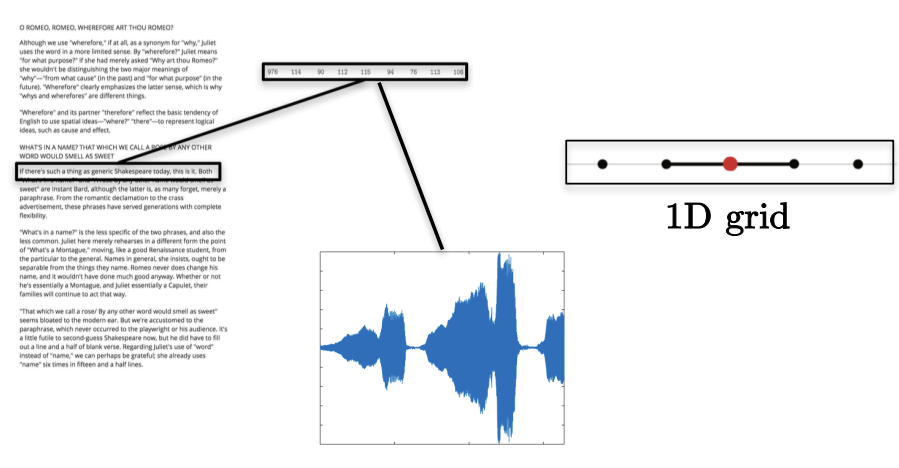
<figcaption aria-hidden="true">Figure: Sentence, word, sound: 1D
Euclidean domains. This image is sourced from the <a
href="http://helper.ipam.ucla.edu/publications/dlt2018/dlt2018_14506.pdf">PAM
Workshop “New Deep Learning Techniques” Feb 7th 2017</a></figcaption>
</figure>

In [192]:
w=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if i==j :
            w[i,j] = 0
        elif i-j == 1 : 
            w[i,j] = 1

In [193]:
lst = []
for i in range(5):
    for j in range(5):
        if w[i,j] == 1:
            lst.append([i,j])

In [194]:
d= w.sum(axis=1)
D= np.diag(d)

> **Note**
>
> 모든 Degree가 동일한, 특히 단위행렬로 나오는(Regular graph인)
> 유클리디안 데이터

In [195]:
D

In [196]:
G = nx.Graph()

In [197]:
G.add_edges_from(np.array(lst))

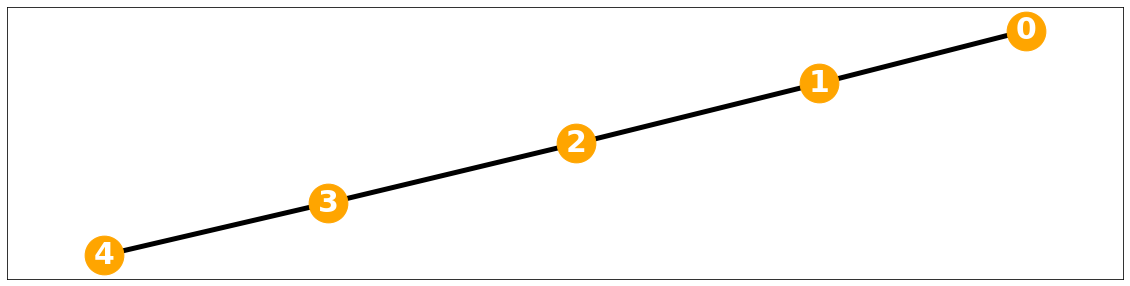

In [198]:
plt.figure(figsize=(20, 5)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

### Ex2) 2d grids

> Image, etc.

<figure>
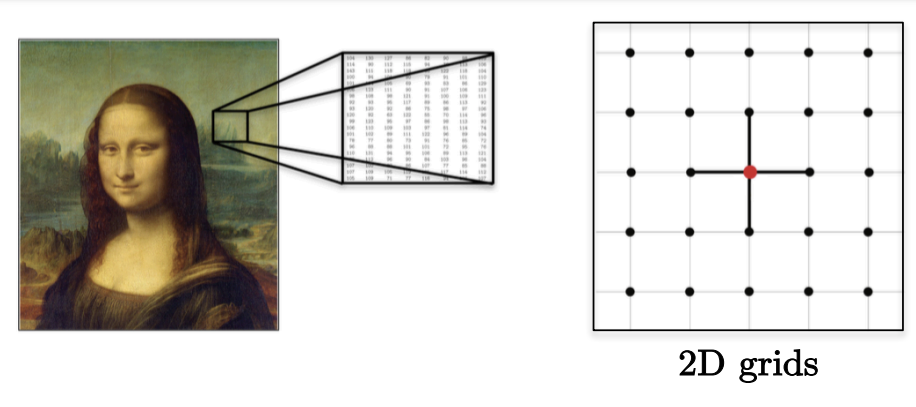
<figcaption aria-hidden="true">Figure: Image, volume, video: 2D, 3D,
2D+1 Euclidean domains. This image is sourced from the <a
href="http://helper.ipam.ucla.edu/publications/dlt2018/dlt2018_14506.pdf">PAM
Workshop “New Deep Learning Techniques” Feb 7th 2017</a></figcaption>
</figure>

In [221]:
w = np.ones((4, 4))
for i in range(4):
    for j in range(4):
        if i==j :
            w[i,j] = 0

In [222]:
lst = []
for i in range(4):
    for j in range(4):
        if w[i,j] == 1:
            lst.append([i,j])

In [223]:
d= w.sum(axis=1)
D= np.diag(d)

> **Note**
>
> 모든 Degree가 동일하여 $D = 3I$로 표현되는(Regular graph인) 유클리디안
> 데이터

In [224]:
D

In [225]:
G = nx.Graph()

In [226]:
G.add_edges_from(np.array(lst))

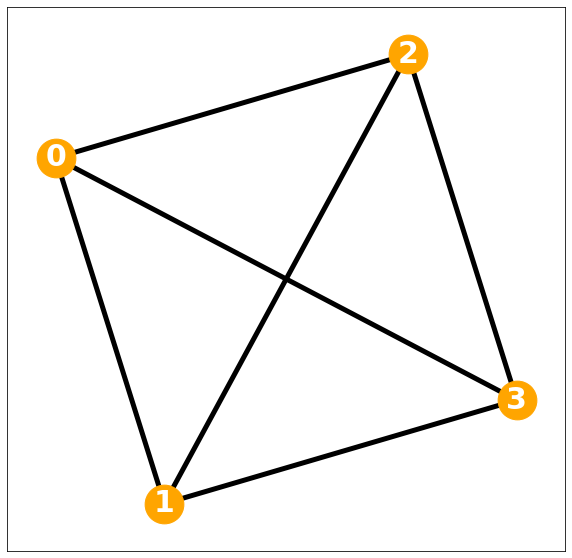

In [227]:
plt.figure(figsize=(10, 10)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

## Non-Euclidean

### Ex3) Different Weights

> Weight 같다고 가정하고 그래프 시각화

In [2]:
w=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if i==j :
            w[i,j] = 0
        elif i!=j: 
            w[i,j] = 1

In [3]:
lst = []
for i in range(5):
    for j in range(5):
        if w[i,j] == 1:
            lst.append([i,j])

In [4]:
G = nx.Graph()

In [5]:
G.add_edges_from(np.array(lst))

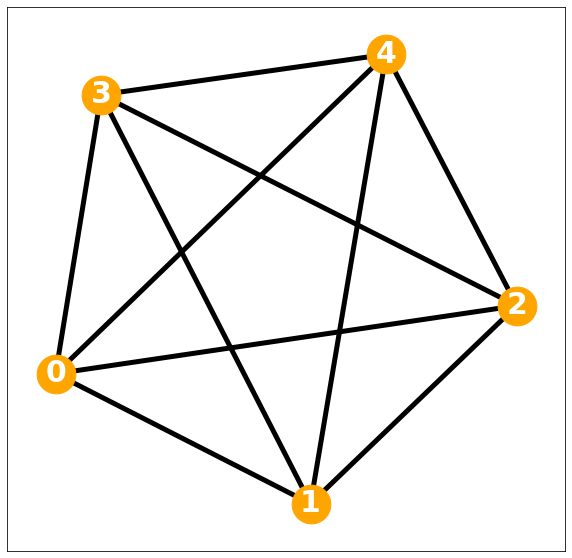

In [9]:
plt.figure(figsize=(10, 10)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

In [10]:
pi=np.pi
ang=np.linspace(-pi,pi-2*pi/5,5)
r=5+np.cos(np.linspace(0,12*pi,5))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,6*pi,5))
f = f1 + np.random.normal(5)

In [11]:
D = np.zeros([5,5])
locations = np.stack([vx, vy],axis=1)
for i in range(5):
    for j in range(i,5):
        D[i,j]=np.linalg.norm(locations[i]-locations[j])
D = D + D.T

In [12]:
D

> **Note**
>
> 가중치 값이 다 다르게 형성되어 있다. 따라서 $D=kI$형태로도 표현할 수
> 없어 레귤러 메트릭스의 정의를 충족하지 못하며, 이는 비유클리디안
> 데이터이다.

### Ex3) Non-Euclidean data with Non-Euclidean domain

> degree matrix가 단위행렬이 아니어서 레귤러 그래프가 아닌 그래프

#### 1. 3D shape, Manifold

> 도메인이 표면(컵)이며, underlying function 이 regular graph로 정의되지
> 않는다.

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

<figure>
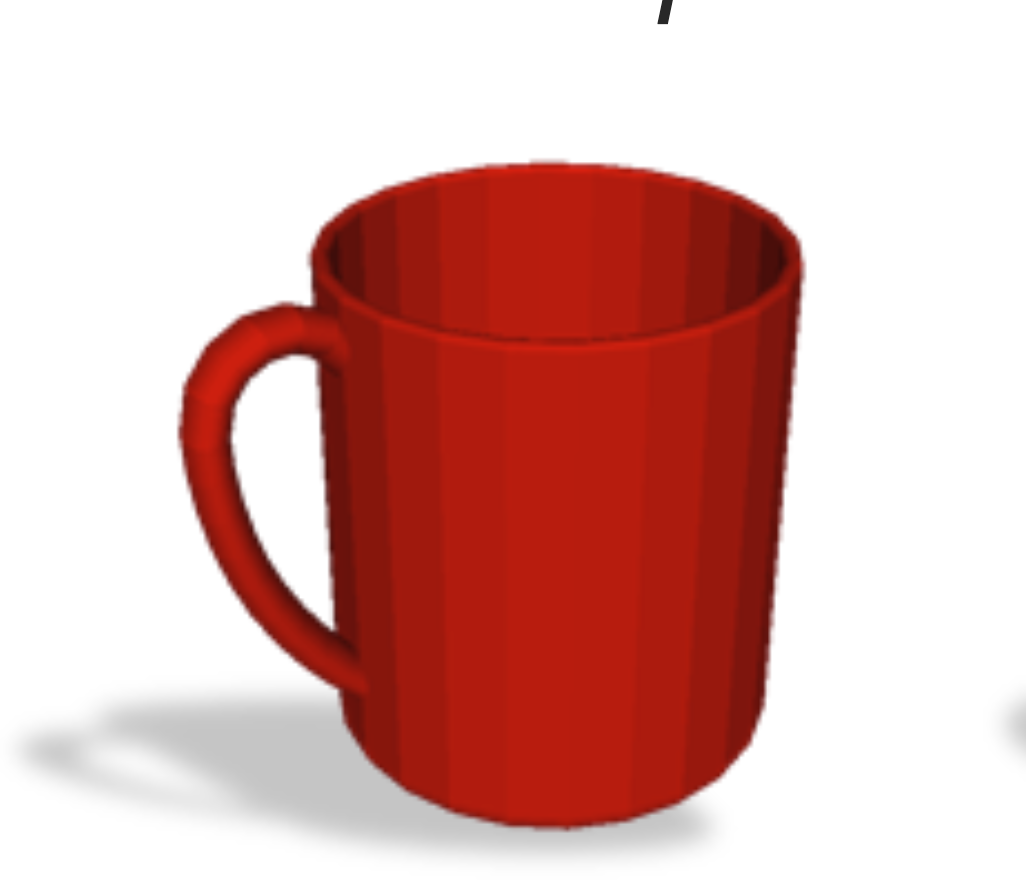
<figcaption aria-hidden="true">Figure: Surface (non-Euclid data). This
image is sourced from the (Fall 2020 course website for Non-Euclidean
Methods in Machine Learning (CS468), Stanford University)</figcaption>
</figure>

#### 2. 3D shape, Manifold

> 도메인이 구로 형성되어 있고, graph로 인지 시, underlying function 이
> 색(파란색)으로 볼 수 있고, 다른 색으로 구성된 것은 $\eta$로 볼 수
> 있고, regular graph로 정의되지 않는다.

*간단 $\eta$ 정의 review = noise 이지만, 특정 i에서 값이 큰 nois를 갖음*

<figure>
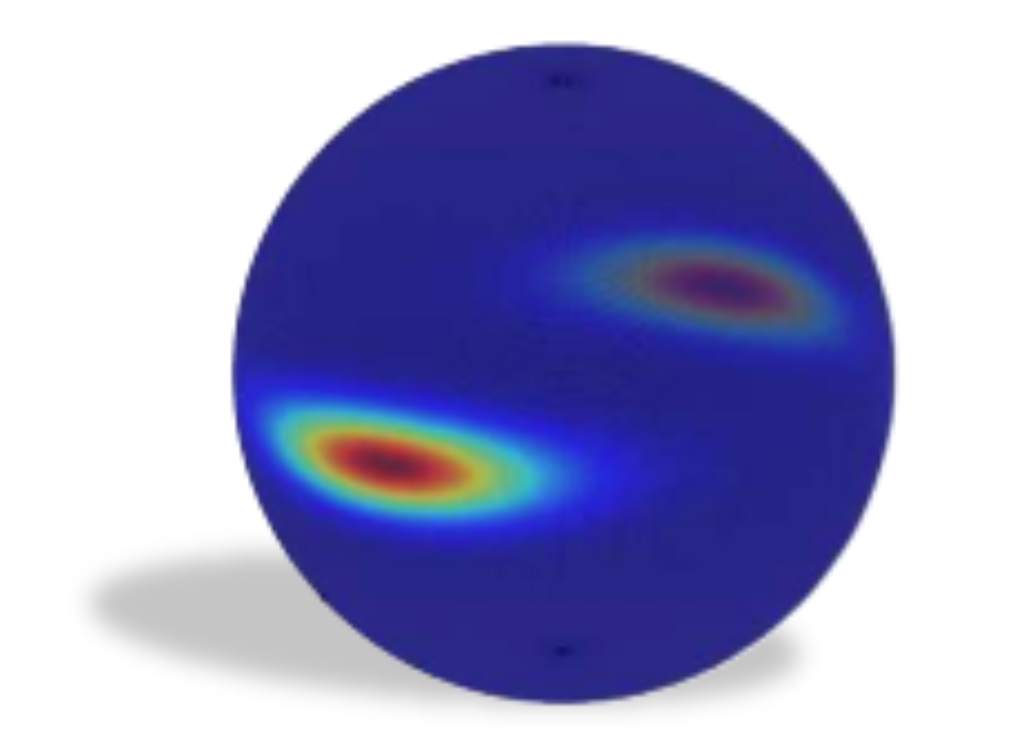
<figcaption aria-hidden="true">Figure: Distributions on 3D shapes
(non-Euclid data). This image is sourced from the <a
href="https://graphics.stanford.edu/courses/cs468-20-fall/">Fall 2020
course website for Non-Euclidean Methods in Machine Learning (CS468),
Stanford University</a></figcaption>
</figure>

#### 3. 3D shape, Manifold

> 도메인이 표면(고양이)이며, underlying function 이 색이라고 할 수 있다.

<figure>
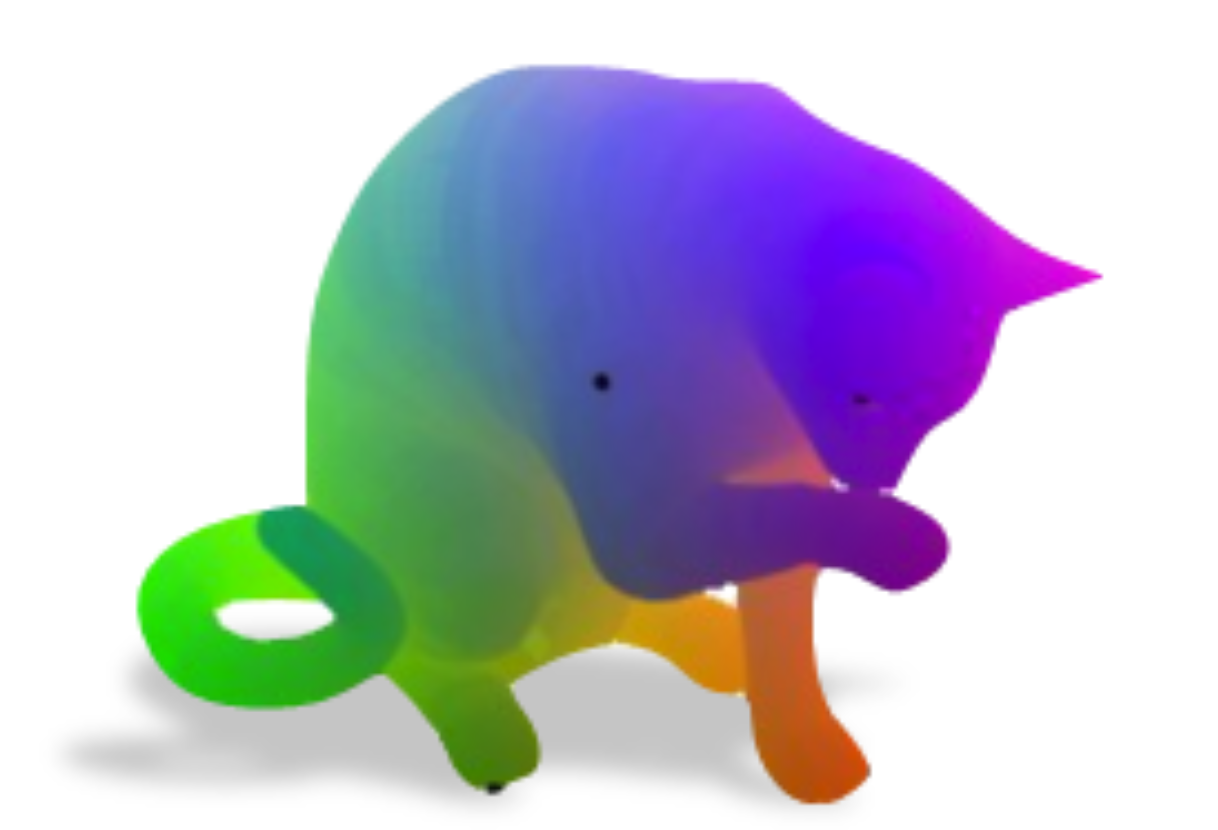
<figcaption aria-hidden="true">Figure: Functions on manifolds
(non-Euclid data). This image is sourced from the <a
href="https://graphics.stanford.edu/courses/cs468-20-fall/">Fall 2020
course website for Non-Euclidean Methods in Machine Learning (CS468),
Stanford University</a></figcaption>
</figure>

#### 4. 3D shape, Manifold

> 도메인이 표면이며, underlying function 이 색이다. graph로 볼 때
> regular graph로 정의되지 않는다.

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

<figure>
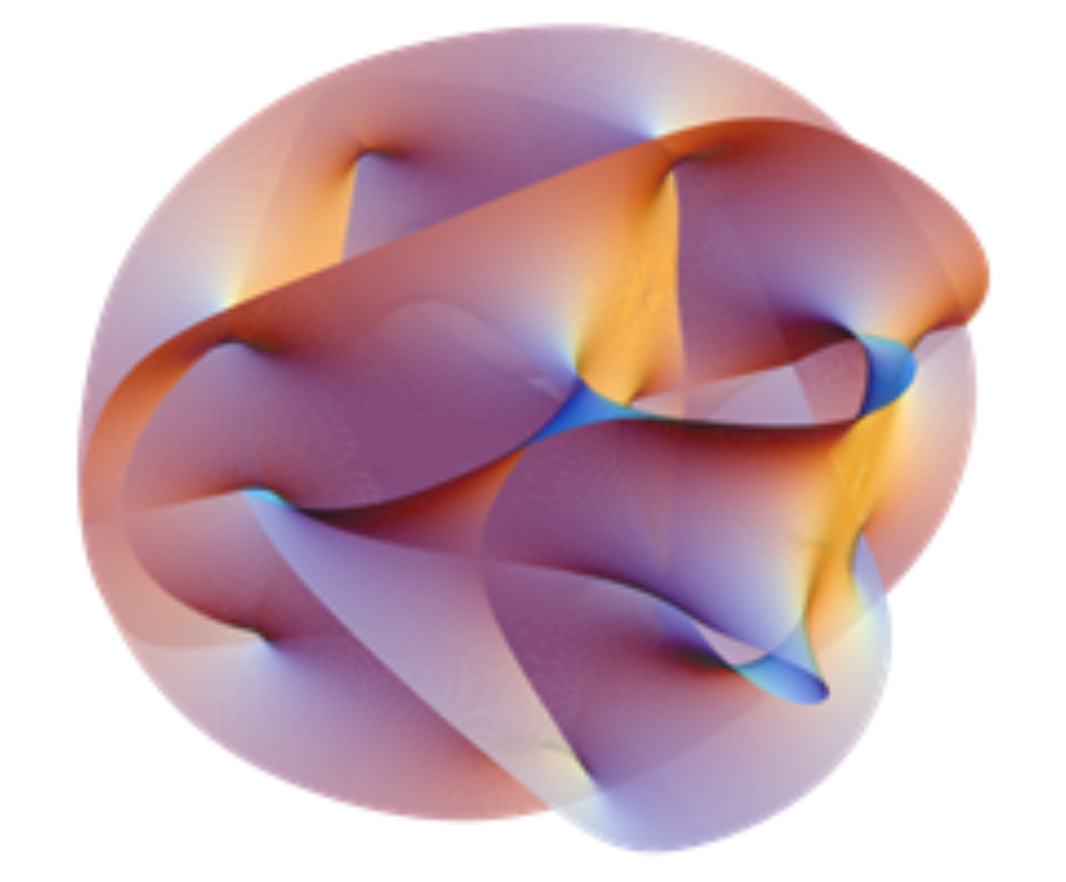
<figcaption aria-hidden="true">Figure: General manifolds (non-Euclid
data). This image is sourced from the (Fall 2020 course website for
Non-Euclidean Methods in Machine Learning (CS468), Stanford
University)</figcaption>
</figure>

#### 5. Graph

> 도메인이 노드인 graph. underlying function 은 정의할 수 없지만 굳이
> 따지자면 Classification work. 신경망 모양..

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

<figure>
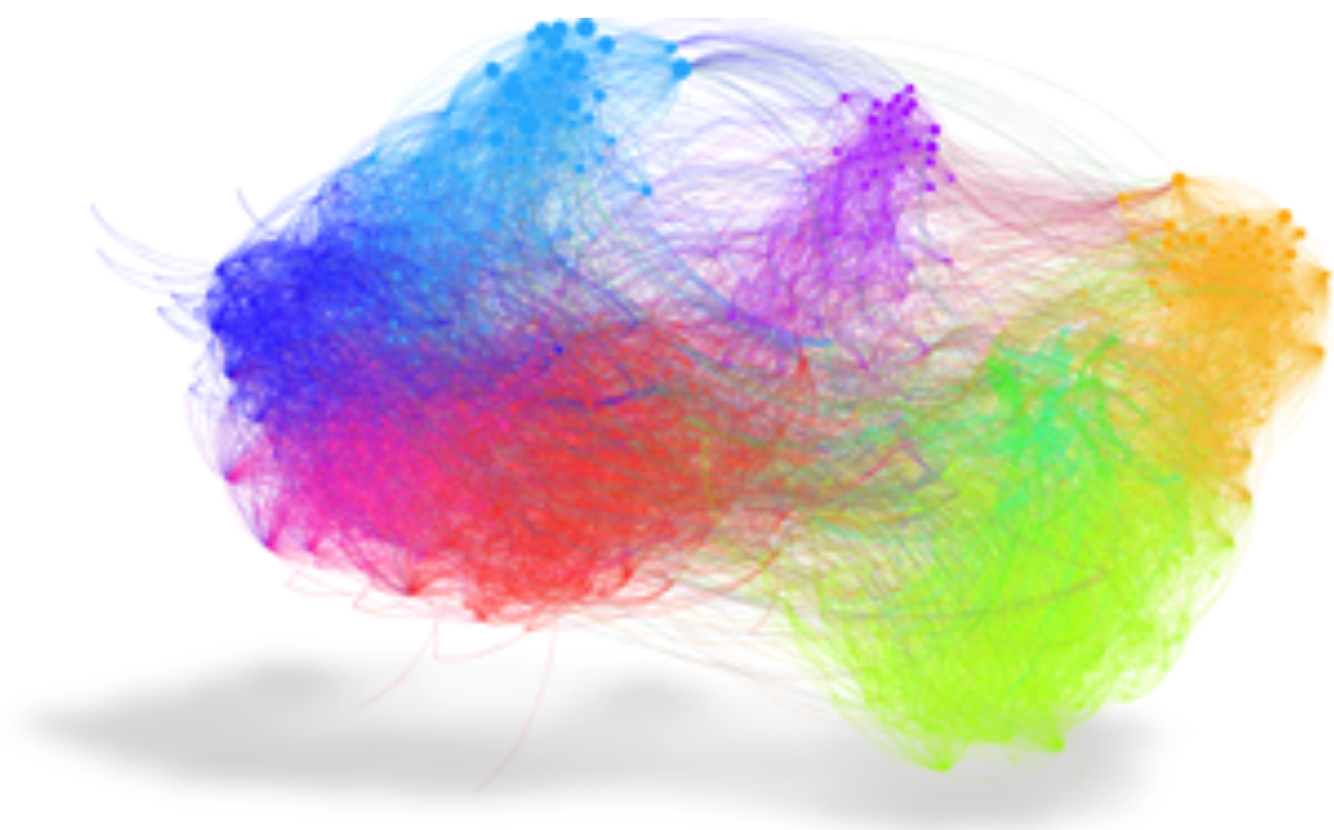
<figcaption aria-hidden="true">Figure: Graphs networks (non-Euclid
data). This image is sourced from the [Fall 2020 course website for
Non-Euclidean Methods in Machine Learning (CS468), Stanford
University]</figcaption>
</figure>

#### 6. Graph(Manifold?)

> 위의 정의 참고, 노드가 도메인인 graph. 색이 underlying function.

Swiss roll (non-euclid data) from (Das and Pal 2021)

<figure>
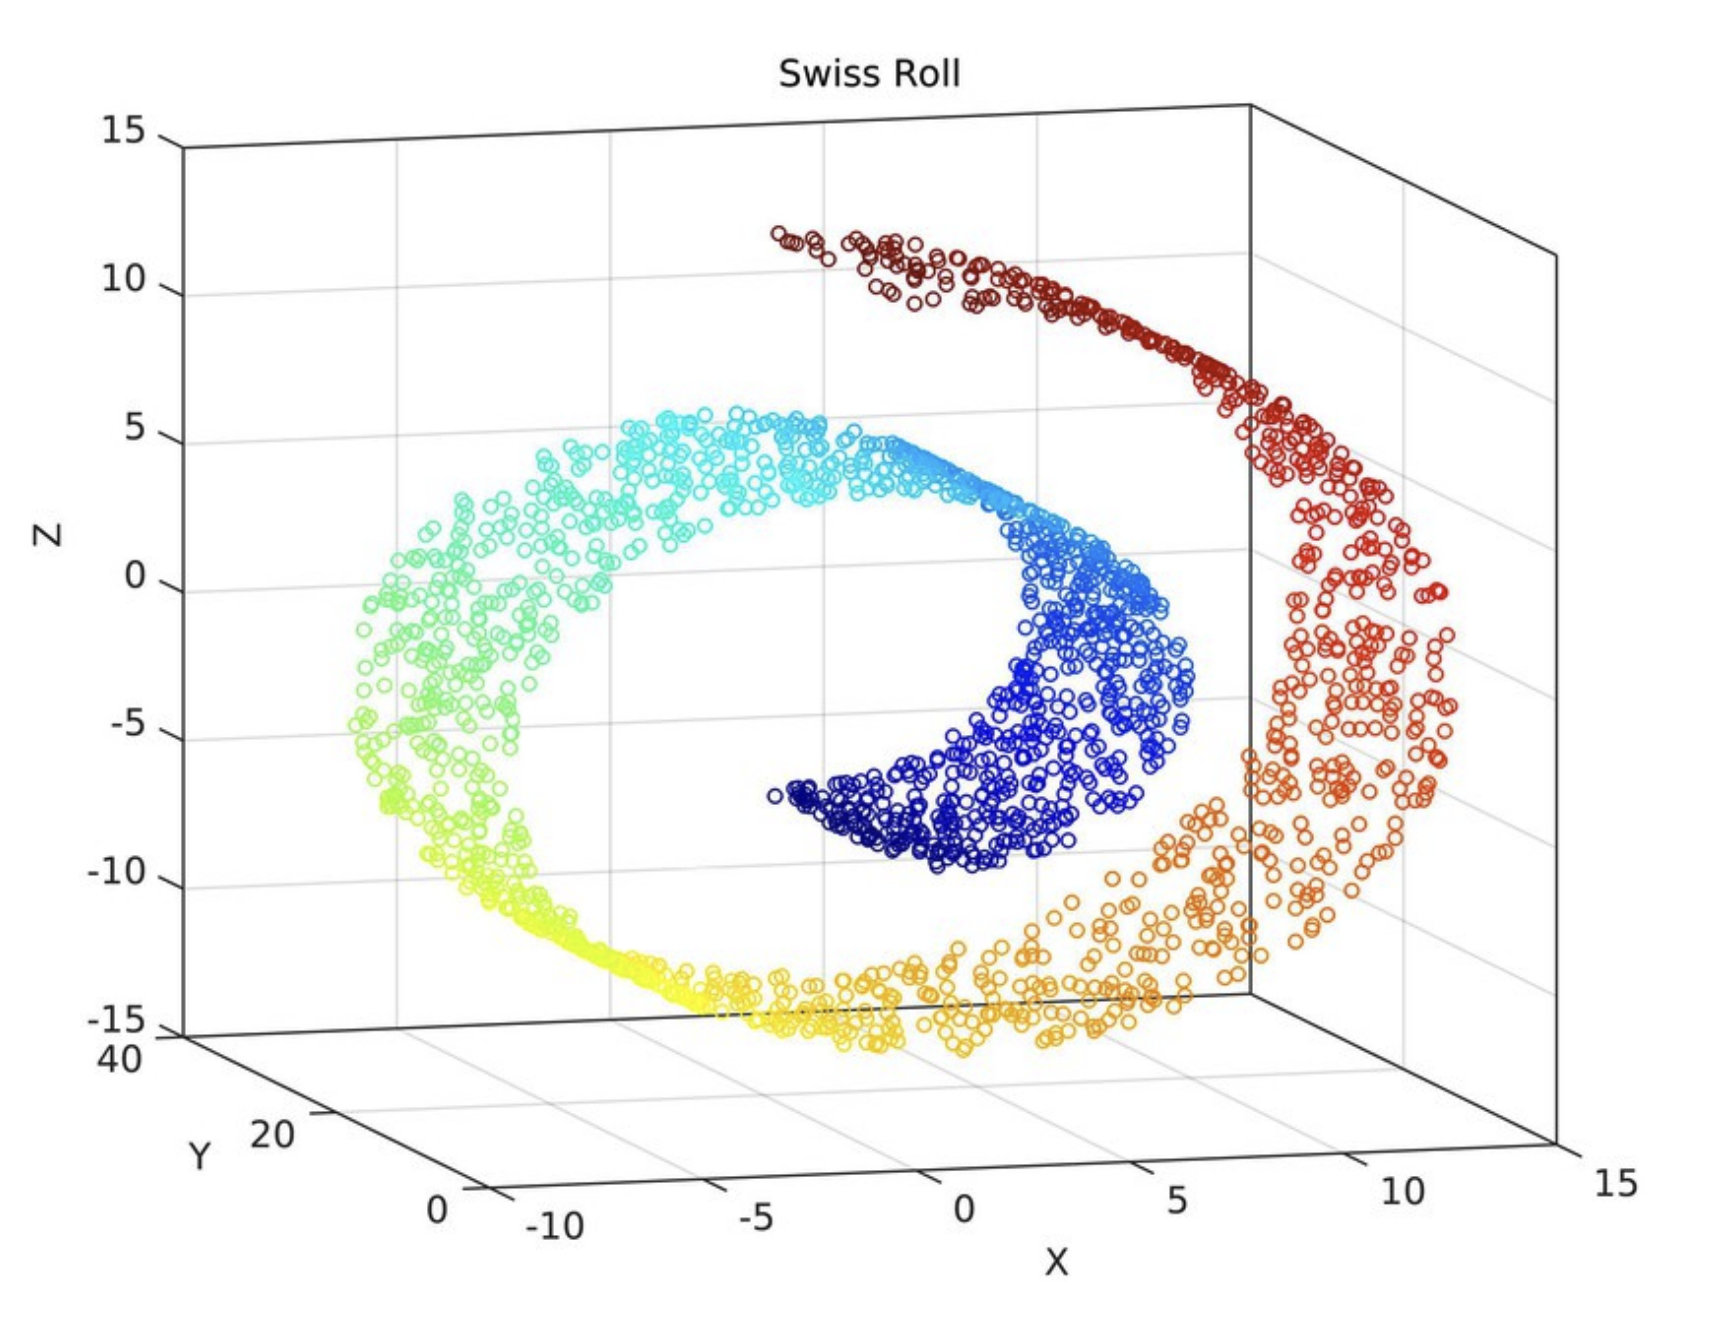
<figcaption aria-hidden="true">Figure: Swiss roll (non-euclid data) from
<span class="citation" data-cites="das2021nonlinear">Das and Pal
(2021)</span></figcaption>
</figure>

#### 7. Graph

> 도메인이 노드이며, classification work

<figure>
<img
src="https://www.frontiersin.org/files/Articles/61343/fncom-08-00051-HTML/image_m/fncom-08-00051-g003.jpg"
alt="Figure: Brain network (non-Euclid data) from Ginestet, Fournel, and Simmons (2014)" />
<figcaption aria-hidden="true">Figure: Brain network (non-Euclid data)
from <span class="citation"
data-cites="ginestet2014statistical">Ginestet, Fournel, and Simmons
(2014)</span></figcaption>
</figure>

#### 8. Graph Signal

> 도메인이 노드(택시 탄 장소)이며, underlying function 이 색(택시 픽업
> 얼마나 하는지를 나타냄, 많이 할 수록 레드쪽으로) regular graph로
> 정의되지 않는다.

<figure>
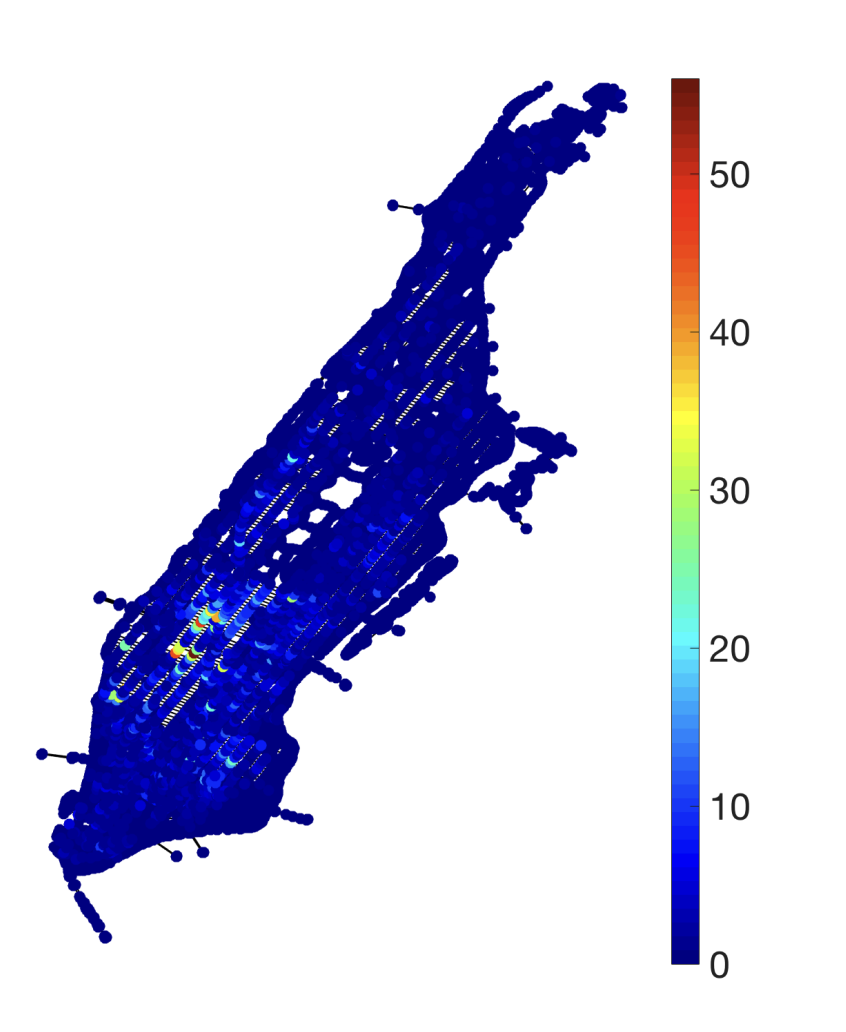
<figcaption aria-hidden="true">Figure: Taxi-pickup distribution in
Manhattan (non-euclid data) from <span class="citation"
data-cites="ortega2018graph">Ortega et al. (2018)</span></figcaption>
</figure>

#### 9. Graph signal, spatiotemporal data

> 도메인이 노드(sequence)이며, underlying function 이 regular graph로
> 정의되지 않는다.(파란색인 양의 signal, 검정색인 음의 signal로
> mapping되어 있는 graph signal의 형태)

<figure>
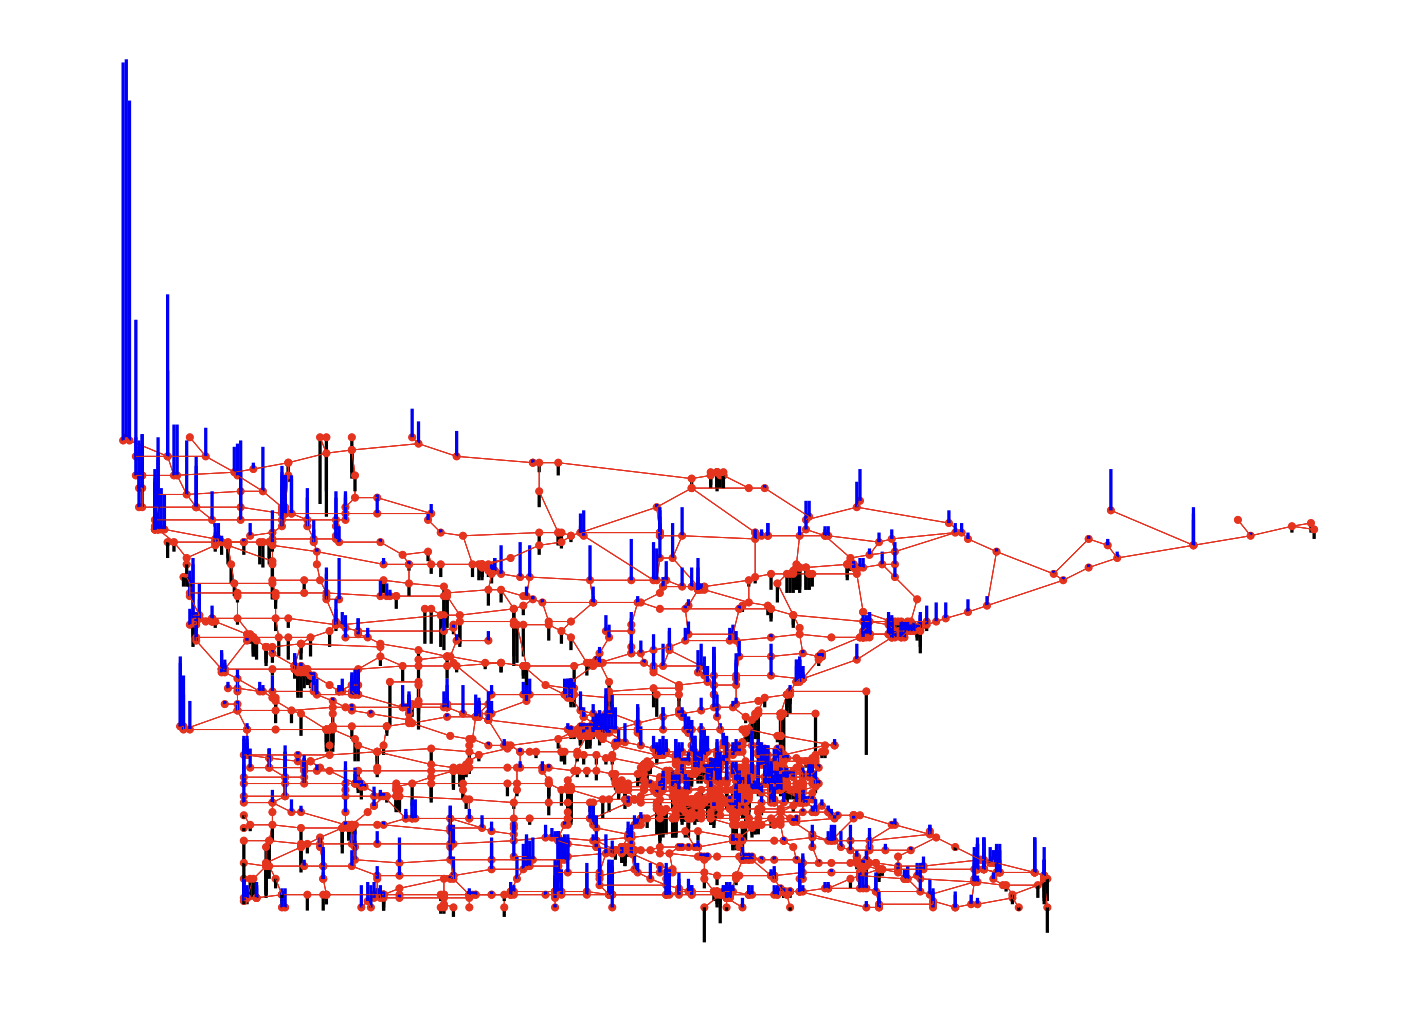
<figcaption aria-hidden="true">Figure: Minnesota road graph (non-euclid
data) from Shuman et al.<span class="citation"
data-cites="shuman2013emerging">(2013)</span></figcaption>
</figure>

#### 10. Graph(Sequence), dynamic spatiotemporal data

> 도메인이 표면(사람,motion을 sequence로 전달)이며, dynamic
> spatiotemporal data

<figure>
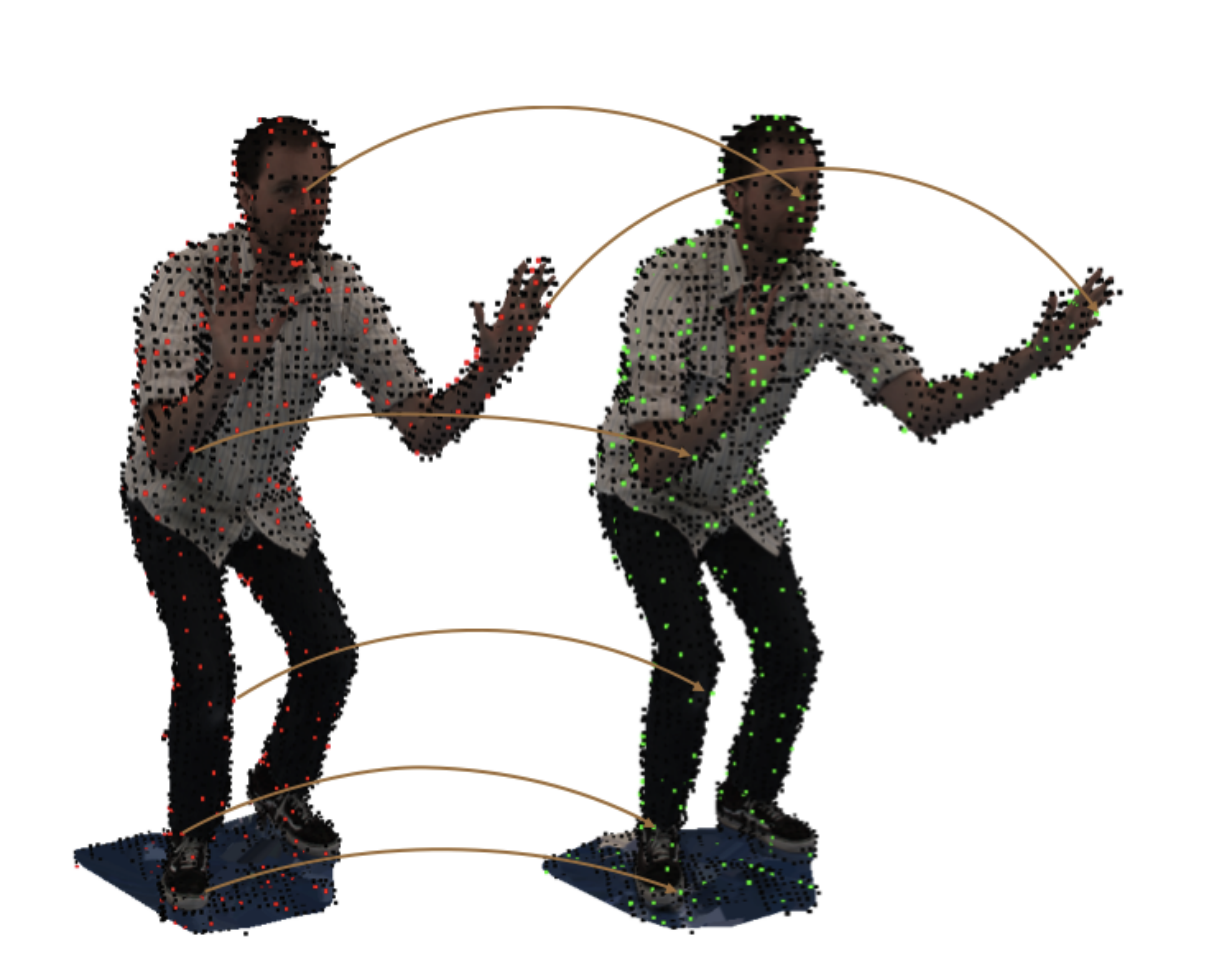
<figcaption aria-hidden="true">Figure: 3D point cloud sequence
(non-euclid data) from <span class="citation"
data-cites="ortega2018graph">(Ortega et al. 2018)</span></figcaption>
</figure>

# Appendix

**Difficulties in analyzing non-Euclidean data**

Analyzing non-Euclidean data is one of the most popular topics in recent
years. These are collectively referred to as geometric deep learning
(Bronstein et al. 2017),(Cao et al. 2020), graph signal processing
(Shuman et al. 2013), and graph learning (Xia et al. 2021).

<figure>
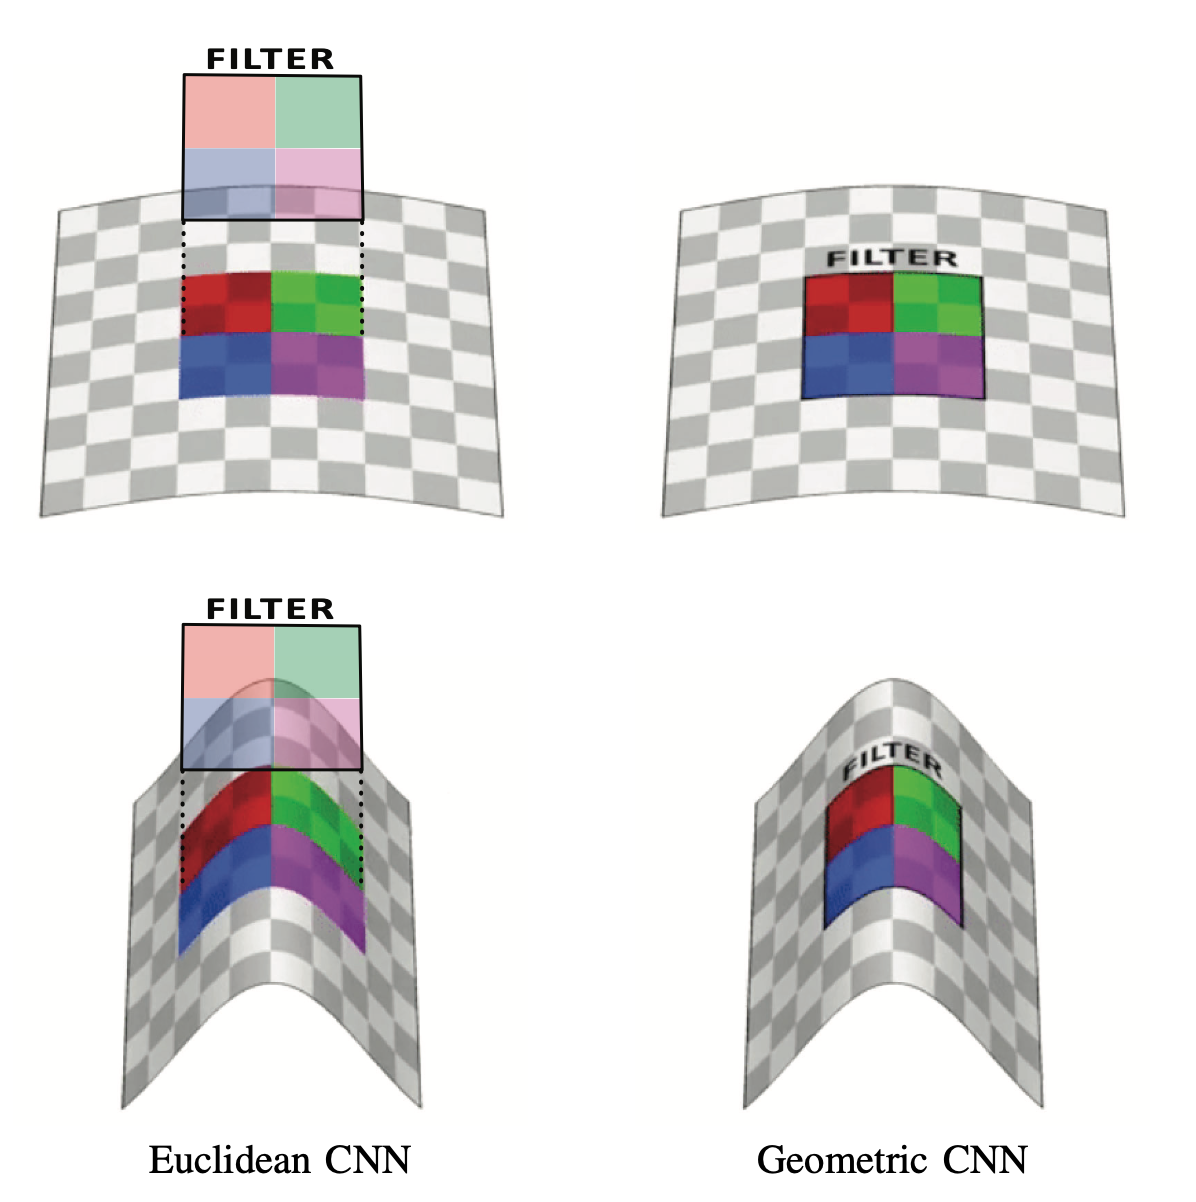
<figcaption aria-hidden="true">Figure. Classical CNN (left) and
geometric CNN</figcaption>
</figure>

Bronstein, Michael M, Joan Bruna, Yann LeCun, Arthur Szlam, and Pierre
Vandergheynst. 2017. “Geometric Deep Learning: Going Beyond Euclidean
Data.” *IEEE Signal Processing Magazine* 34 (4): 18–42.

Cao, Wenming, Zhiyue Yan, Zhiquan He, and Zhihai He. 2020. “A
Comprehensive Survey on Geometric Deep Learning.” *IEEE Access* 8:
35929–49.

Das, Suchismita, and Nikhil R Pal. 2021. “Nonlinear Dimensionality
Reduction for Data Visualization: An Unsupervised Fuzzy Rule-Based
Approach.” *IEEE Transactions on Fuzzy Systems* 30 (7): 2157–69.

Ginestet, Cedric E, Arnaud P Fournel, and Andrew Simmons. 2014.
“Statistical Network Analysis for Functional MRI: Summary Networks and
Group Comparisons.” *Frontiers in Computational Neuroscience* 8: 51.

Ortega, Antonio, Pascal Frossard, Jelena Kovačević, José MF Moura, and
Pierre Vandergheynst. 2018. “Graph Signal Processing: Overview,
Challenges, and Applications.” *Proceedings of the IEEE* 106 (5):
808–28.

Shuman, David I, Sunil K Narang, Pascal Frossard, Antonio Ortega, and
Pierre Vandergheynst. 2013. “The Emerging Field of Signal Processing on
Graphs: Extending High-Dimensional Data Analysis to Networks and Other
Irregular Domains.” *IEEE Signal Processing Magazine* 30 (3): 83–98.

Xia, Feng, Ke Sun, Shuo Yu, Abdul Aziz, Liangtian Wan, Shirui Pan, and
Huan Liu. 2021. “Graph Learning: A Survey.” *IEEE Transactions on
Artificial Intelligence* 2 (2): 109–27.